# Assignment 1 Linear and multiple regression
### Name: Tanmay Walke
### Date: 20 Jan 2025
### Class: Y-CSE(AI)
### Roll No.: 65

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('house_price_regression_dataset.csv')

In [4]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [7]:
#checking for null values
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [8]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [6]:
# Split the dataset into training and testing sets (80:20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#train and test split so not to include indexes of each row
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [7]:
# Displaying head and tail of  testing dataset
print("Training Set - Head:")
print(train_df.head())
print("\nTraining Set - Tail:")
print(train_df.tail())

# Display head and tail of  testing dataset
print("\nTesting Set - Head:")
print(test_df.head())
print("\nTesting Set - Tail:")
print(test_df.tail())

Training Set - Head:
     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
29             2028             2              3        1967  1.784790   
535            3519             5              3        1966  4.009947   
695            4507             2              3        2014  4.122337   
557            3371             4              2        2000  1.580318   
836            2871             5              1        1974  3.426914   

     Garage_Size  Neighborhood_Quality    House_Price  
29             2                     2  434165.896634  
535            0                    10  788284.690202  
695            0                     7  985499.196316  
557            0                     1  736289.124555  
836            2                     6  636552.752485  

Training Set - Tail:
     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
106            2257             5              1        1968  3.131006   
270            3894         

# Visualization

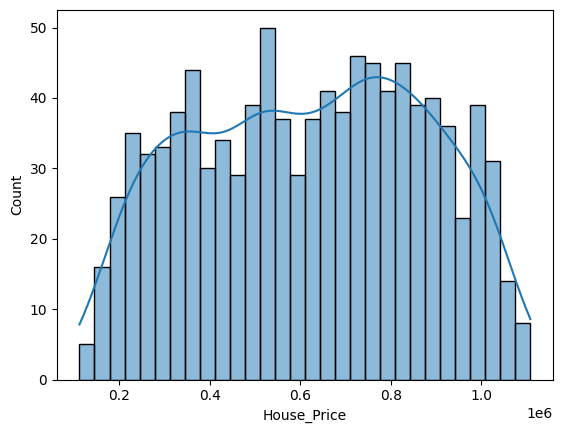

In [11]:
sns.histplot(df['House_Price'], bins=30,kde=True)
plt.show()

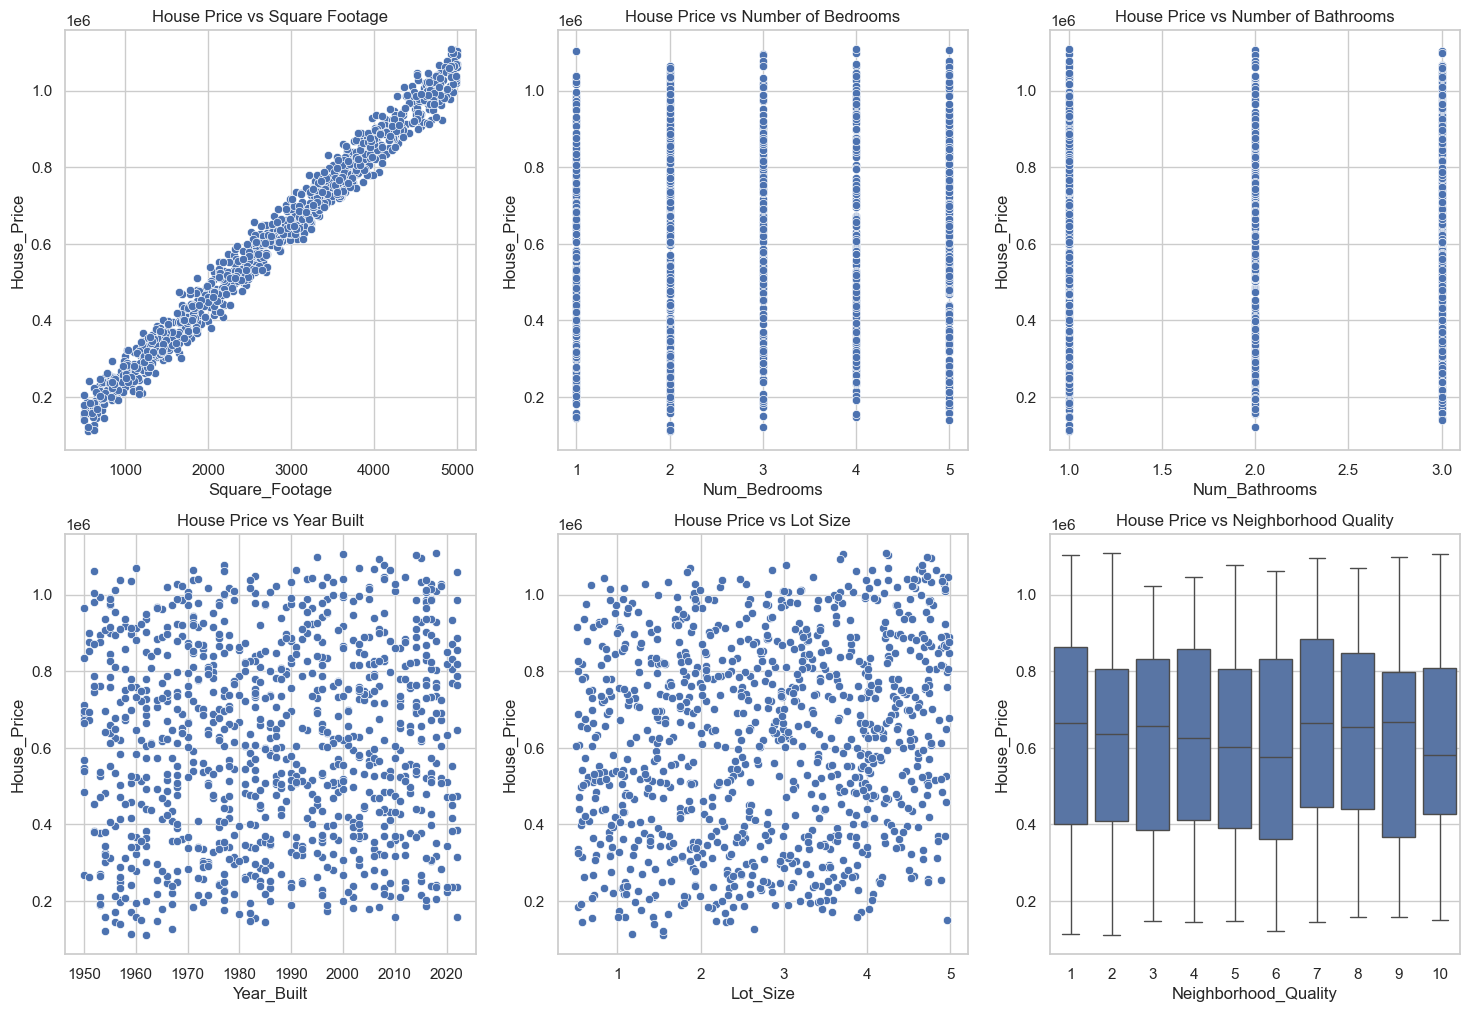

In [12]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axes array to easily iterate
axes = axes.flatten()

#Plot House Price vs Square Footage
sns.scatterplot(x=df['Square_Footage'], y=df['House_Price'], ax=axes[0])
axes[0].set_title('House Price vs Square Footage')
# Plot House Price vs Number of Bedrooms
sns.scatterplot(x=df['Num_Bedrooms'], y=df['House_Price'], ax=axes[1])
axes[1].set_title('House Price vs Number of Bedrooms')

# Plot House Price vs Number of Bathrooms
sns.scatterplot(x=df['Num_Bathrooms'], y=df['House_Price'], ax=axes[2])
axes[2].set_title('House Price vs Number of Bathrooms')

# Plot House Price vs Year Built
sns.scatterplot(x=df['Year_Built'], y=df['House_Price'], ax=axes[3])
axes[3].set_title('House Price vs Year Built')

# Plot House Price vs Lot Size
sns.scatterplot(x=df['Lot_Size'], y=df['House_Price'], ax=axes[4])
axes[4].set_title('House Price vs Lot Size')

# Plot House Price vs Neighborhood Quality (categorical dat so using box plot)
sns.boxplot(x=df['Neighborhood_Quality'], y=df['House_Price'], ax=axes[5])
axes[5].set_title('House Price vs Neighborhood Quality')
plt.show()

In [8]:
#independent variables
x = df.drop(['House_Price','Year_Built'], axis=1)

In [9]:
x.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,0.599637,0,5
1,4272,3,3,4.753014,1,6
2,3592,1,2,3.634823,0,9
3,966,1,2,2.730667,1,8
4,4926,2,1,4.699073,0,8


In [10]:
#target variable
y = df['House_Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
linear_reg = LinearRegression()

In [13]:
linear_reg.fit(X_train,y_train)


LinearRegression()

In [14]:
#predicting the test data
pred = linear_reg.predict(X_test)

In [15]:
#evaluating performance of model
mse=mean_absolute_error(y_test, pred)
print(mse)

18422.346804867502


In [16]:
rmse = np.sqrt(mse)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 135.7289460832416


In [22]:
#r squared score to evaluate performance (coefficient of determination), close to 1 is perfect model
r2_score(y_test, pred)

0.9924702735621432

## Regression predicted vs actual datapoints plot

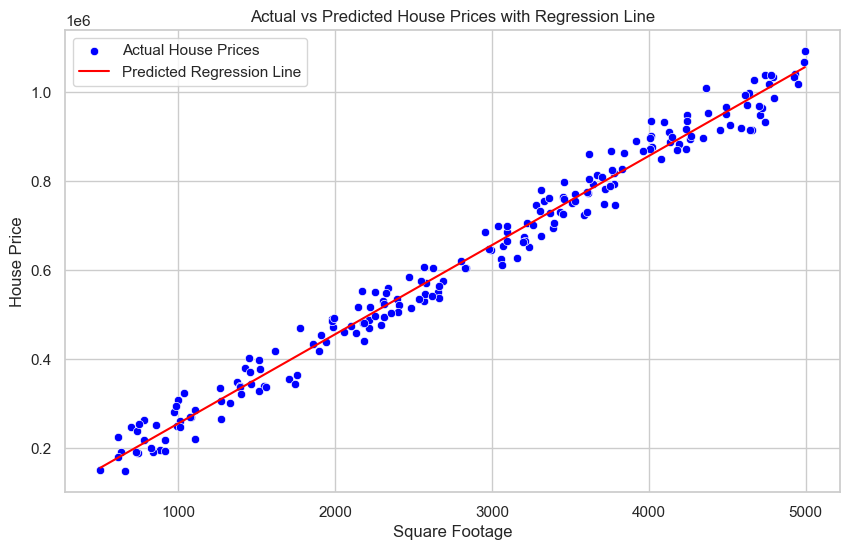

In [23]:

y = df['House_Price']
X = df[['Square_Footage']]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()


linear_reg.fit(X_train, y_train)

pred = linear_reg.predict(X_test)

plt.figure(figsize=(10, 6))


sns.scatterplot(x=X_test['Square_Footage'], y=y_test, color='blue', label='Actual House Prices')


sns.lineplot(x=X_test['Square_Footage'], y=pred, color='red', label='Predicted Regression Line')

plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices with Regression Line')
plt.legend()

plt.show()
